In [4]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import median

# Plot Anaylisis

## One Time Preprocessing

General

In [7]:
results_path = './plotData/results/'
progress_logs_path = './plotData/progress_logs/'


pbc_results = glob.glob(os.path.join(results_path, "*pbc*.csv"))
pharynx_results = glob.glob(os.path.join(results_path, "*pharynx*.csv"))
poker_results = glob.glob(os.path.join(results_path, "*poker*.csv"))

lst = []
for file in pbc_results:
    df = pd.read_csv(file)
    lst.append(df)
pbc_dataframe = pd.concat(lst, axis=0, ignore_index=True)

lst = []
for file in pharynx_results:
    df = pd.read_csv(file)
    lst.append(df)
pharynx_dataframe = pd.concat(lst, axis=0, ignore_index=True)

lst = []
for file in poker_results:
    df = pd.read_csv(file)
    lst.append(df)
poker_dataframe = pd.concat(lst, axis=0, ignore_index=True)

pbc_dataframe.to_csv('./results_datasets/pbc_results.csv', index=False)
pharynx_dataframe.to_csv('./results_datasets/pharynx_results.csv', index=False)
poker_dataframe.to_csv('./results_datasets/poker_results.csv', index=False)

For each seed

In [3]:
file = open("random_seeds.txt", "r")
random_seeds = file.read()
file.close()

random_seeds = random_seeds.replace("\n", "").replace(" ", "").split(",")

results_path = './plotData/results/'
progress_logs_path = './plotData/progress_logs/'

for seed in random_seeds:
    pbc_results = glob.glob(os.path.join(results_path, "*pbc*"+seed+"*.csv"))
    pharynx_results = glob.glob(os.path.join(results_path, "*pharynx*"+seed+"*.csv"))
    poker_results = glob.glob(os.path.join(results_path, "*poker*"+seed+"*.csv"))

    lst = []
    for file in pbc_results:
        df = pd.read_csv(file)
        df.insert(0, 'seed', seed)
        lst.append(df)
    pbc_dataframe = pd.concat(lst, axis=0, ignore_index=True)

    lst = []
    for file in pharynx_results:
        df = pd.read_csv(file)
        df.insert(0, 'seed', seed)
        lst.append(df)
    pharynx_dataframe = pd.concat(lst, axis=0, ignore_index=True)

    lst = []
    for file in poker_results:
        df = pd.read_csv(file)
        df.insert(0, 'seed', seed)
        lst.append(df)
    poker_dataframe = pd.concat(lst, axis=0, ignore_index=True)

    pbc_dataframe.to_csv('./results_datasets/pbc_results_seed_'+seed+'.csv', index=False)
    pharynx_dataframe.to_csv('./results_datasets/pharynx_results_seed_'+seed+'.csv', index=False)
    poker_dataframe.to_csv('./results_datasets/poker_results_seed_'+seed+'.csv', index=False)

In [4]:
datasets_path = './results_datasets/'

pbc_datasets = glob.glob(os.path.join(datasets_path, "*pbc*.csv"))
pharynx_datasets = glob.glob(os.path.join(datasets_path, "*pharynx*.csv"))
poker_datasets = glob.glob(os.path.join(datasets_path, "*poker*.csv"))

lst = []
for file in pbc_datasets:
    df = pd.read_csv(file)
    lst.append(df)
pbc_dataframe = pd.concat(lst, axis=0, ignore_index=True)

lst = []
for file in pharynx_datasets:
    df = pd.read_csv(file)
    lst.append(df)
pharynx_dataframe = pd.concat(lst, axis=0, ignore_index=True)

lst = []
for file in poker_datasets:
    df = pd.read_csv(file)
    lst.append(df)
poker_dataframe = pd.concat(lst, axis=0, ignore_index=True)

pbc_dataframe.to_csv('./preprocessed_datasets/pbc_results.csv', index=False)
pharynx_dataframe.to_csv('./preprocessed_datasets/pharynx_results.csv', index=False)
poker_dataframe.to_csv('./preprocessed_datasets/poker_results.csv', index=False)

## Actual Analysis

In [5]:
pbc_dataframe = pd.read_csv('./preprocessed_datasets/pbc_results.csv')
pharynx_dataframe = pd.read_csv('./preprocessed_datasets/pharynx_results.csv')
poker_dataframe = pd.read_csv('./preprocessed_datasets/poker_results.csv')

In [6]:
pbc_dataframe.drop(columns=['model', 'final_population', 'n_nodes', 'evaluations'], inplace=True)
pharynx_dataframe.drop(columns=['model', 'final_population', 'n_nodes', 'evaluations'], inplace=True)
poker_dataframe.drop(columns=['model', 'final_population', 'n_nodes', 'evaluations'], inplace=True)

In [105]:
pbc_dataframe = pbc_dataframe.sort_values(by=['training_set_dimension','popsize','generations'], ascending=True)

In [7]:
pbc_dataframe

,seed,training_set_dimension,popsize,generations,test_rmse,train_rmse,time_taken
0,406090,100000,1000,10,949.100470,948.137605,0 days 00:11:28.293407
1,406090,100000,1000,100,917.103576,915.843414,0 days 03:10:54.535858
2,406090,100000,1000,1000,1825.685615,900.532601,2 days 01:29:33.696467
3,406090,100000,100,10,952.088373,951.747125,0 days 00:00:42.768996
4,406090,100000,100,100,921.485229,919.915352,0 days 00:12:07.094941
...,...,...,...,...,...,...,...
723,954789,100,100,10,1006.993752,890.076200,0 days 00:00:00.019257
724,954789,100,100,100,3432.350453,779.221350,0 days 00:00:00.301438
725,954789,100,10,10,1034.710288,930.130561,0 days 00:00:00.000995
726,954789,100,10,100,1034.710288,930.130561,0 days 00:00:00.004023


This piece of code retrieves all n-tuple of training_set_dimension, popsize, generations and makes the median from all the seeds with the same n-tuple
Then it creates a new dataframe without seeds where the test_rmse is the median calculated before

In [12]:
lst = []
already_iterated = []

for training_set_dimension, popsize, generations in zip(pbc_dataframe.training_set_dimension, pbc_dataframe.popsize, pbc_dataframe.generations):
    if [training_set_dimension, popsize, generations] in already_iterated:
        continue
    already_iterated.append([training_set_dimension,popsize,generations])
    rows = pbc_dataframe.loc[(pbc_dataframe['training_set_dimension'] == training_set_dimension) & (pbc_dataframe['popsize'] == popsize) & (pbc_dataframe['generations'] == generations)]
    lst.append([training_set_dimension, popsize, generations, median(rows['test_rmse'].values)])

median_pbc_dataframe = pd.DataFrame(lst, columns=['training_set_dimension', 'popsize', 'generations', 'median_test_rmse'])

In [ ]:
median_pbc_dataframe

In [8]:
def median_dataframe(df):
    lst = []
    already_iterated = []

    for training_set_dimension, popsize, generations in zip(df.training_set_dimension, df.popsize, df.generations):
        if [training_set_dimension, popsize, generations] in already_iterated:
            continue
        already_iterated.append([training_set_dimension,popsize,generations])
        rows = df.loc[(df['training_set_dimension'] == training_set_dimension) & (df['popsize'] == popsize) & (df['generations'] == generations)]
        lst.append([training_set_dimension, popsize, generations, median(rows['test_rmse'].values)])

    return pd.DataFrame(lst, columns=['training_set_dimension', 'popsize', 'generations', 'median_test_rmse'])

[]

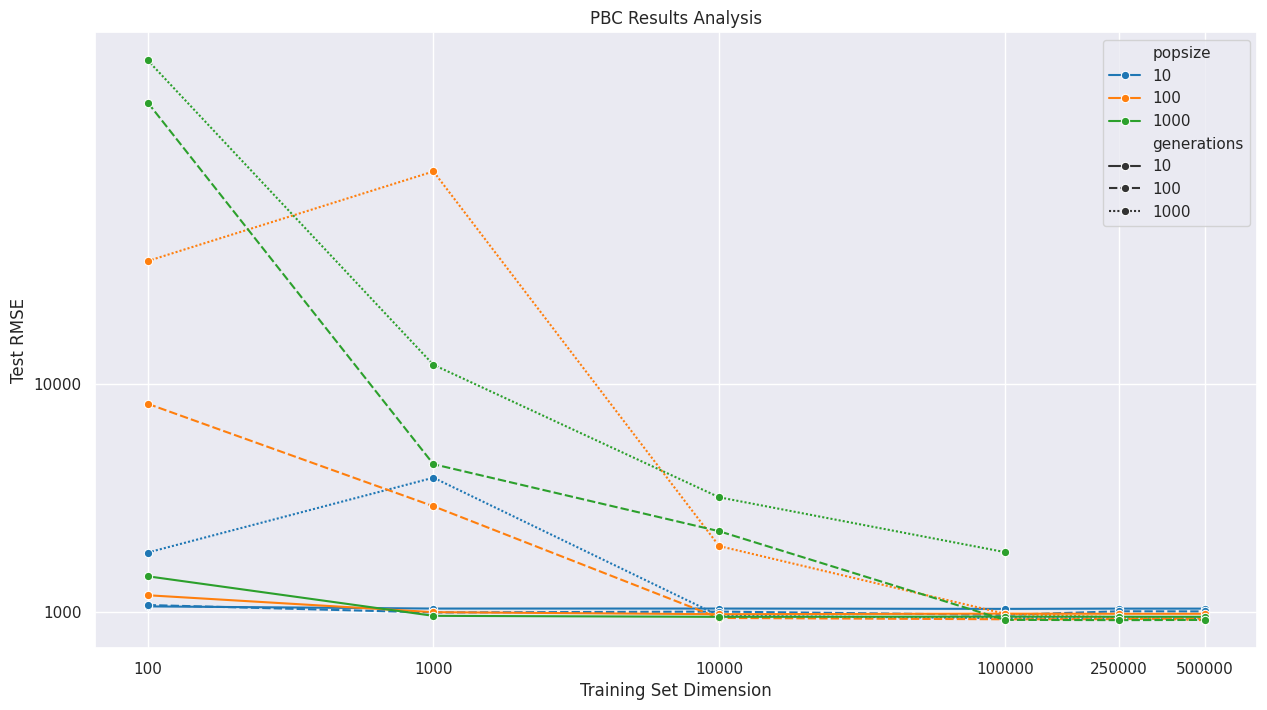

In [14]:
sns.set_theme(rc={'figure.figsize':(15,8)})
#sns.set_theme(style="darkgrid")

pbc_plot = sns.lineplot(data=median_pbc_dataframe, x='training_set_dimension', y='median_test_rmse', hue='popsize', style='generations', marker='o', errorbar=None, palette='tab10')
pbc_plot.set_xscale('log')
pbc_plot.set_yscale('log')
pbc_plot.set_title('PBC Results Analysis')
pbc_plot.set_xlabel('Training Set Dimension')
pbc_plot.set_ylabel('Test RMSE')
pbc_plot.set_xticks([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_xticklabels([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_yticks([0, 100, 1000, 10000])
pbc_plot.set_yticklabels([0, 100, 1000, 10000])
#pbc_plot.set_xlim(100)
#pbc_plot.set_ylim(0, 100000)

pbc_plot.plot()


In [ ]:
median_pharynx_dataframe = median_dataframe(pharynx_dataframe)
median_pharynx_dataframe

[]

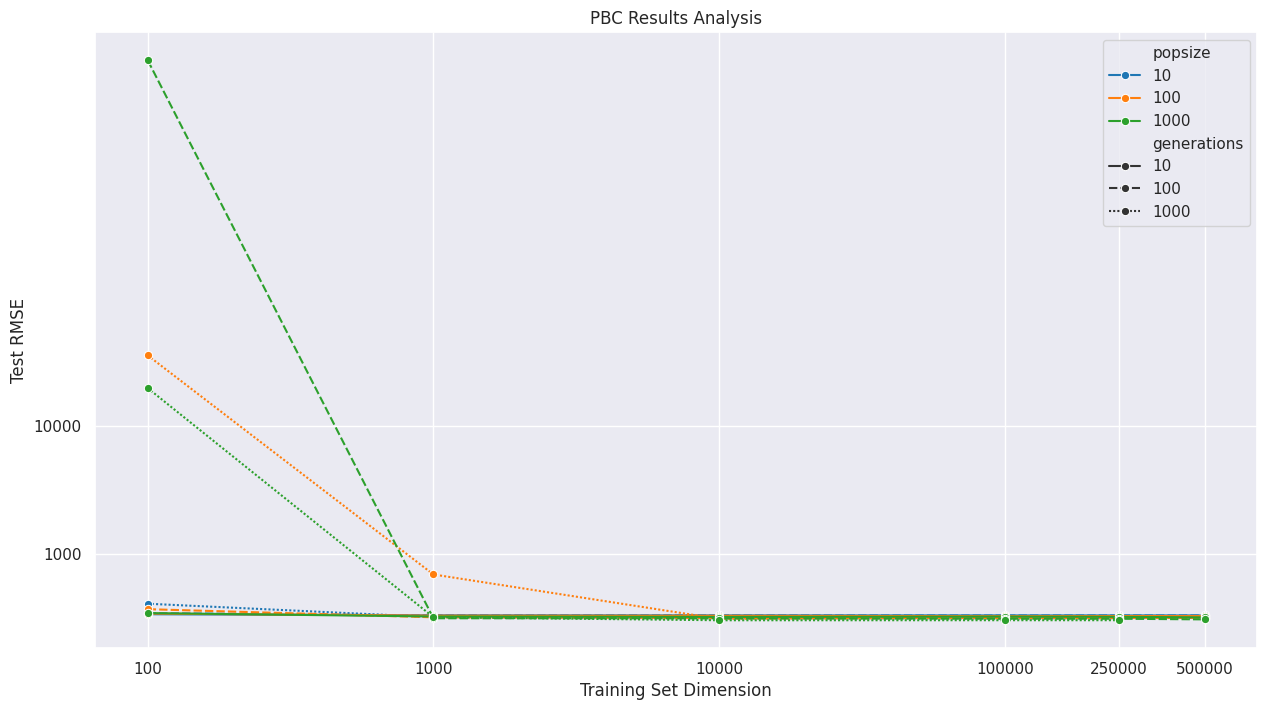

In [11]:
sns.set_theme(rc={'figure.figsize':(15,8)})
#sns.set_theme(style="darkgrid")

pbc_plot = sns.lineplot(data=median_pharynx_dataframe, x='training_set_dimension', y='median_test_rmse', hue='popsize', style='generations', marker='o', errorbar=None, palette='tab10')
pbc_plot.set_xscale('log')
pbc_plot.set_yscale('log')
pbc_plot.set_title('PBC Results Analysis')
pbc_plot.set_xlabel('Training Set Dimension')
pbc_plot.set_ylabel('Test RMSE')
pbc_plot.set_xticks([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_xticklabels([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_yticks([0, 100, 1000, 10000])
pbc_plot.set_yticklabels([0, 100, 1000, 10000])
#pbc_plot.set_xlim(100)
#pbc_plot.set_ylim(0, 100000)

pbc_plot.plot()
